7. Śmierć pacjenta
• Estymacja niewydolności serca
• Aplikacja pokazująca lekarzowi prawdopodobieństwo zdarzenia
• https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import imblearn as imb
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
train = pd.read_csv("train_set.csv")
test = pd.read_csv("test_set.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [6]:
df.shape

(299, 13)

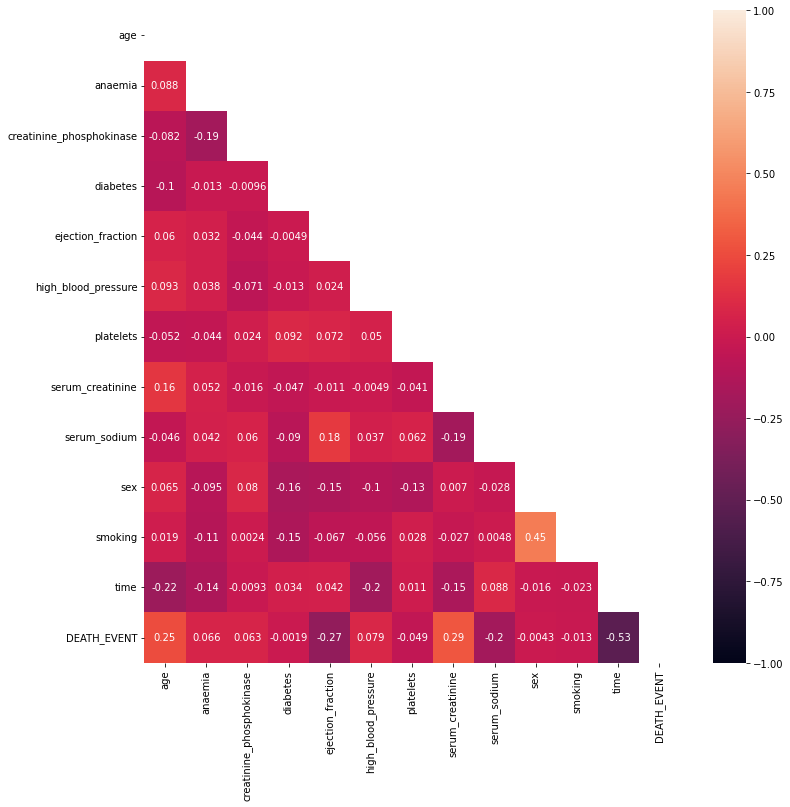

In [7]:
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(df.corr()), k=0) 
sns.heatmap(df.corr(), annot=True, mask = mask, vmin=-1., vmax=1.)
pass

In [8]:
df.corr()["DEATH_EVENT"].sort_values(ascending=False)[1:]

serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

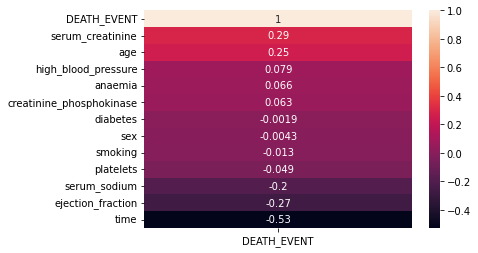

In [9]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), annot = True)
plt.show()

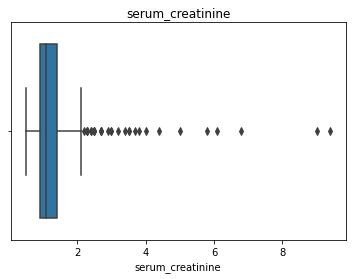

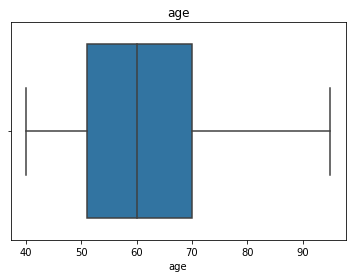

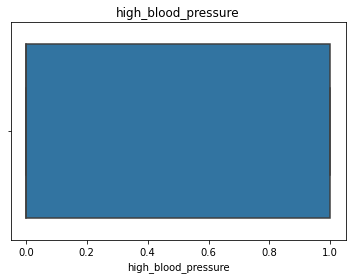

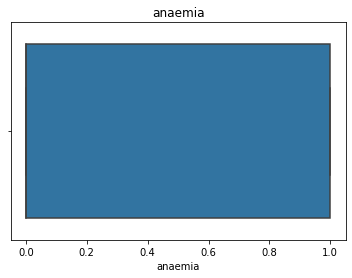

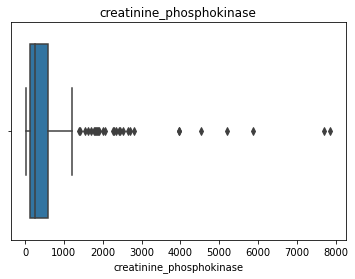

In [10]:
columns = ["serum_creatinine", "age", "high_blood_pressure", "anaemia", "creatinine_phosphokinase"]

for i in columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [11]:
# Train test split został wykonany przez Błażeja, który udostępnił nam dane abyśmy mogli pracować na takich samych zbiorach

In [12]:
X_train, y_train = train.drop(columns="DEATH_EVENT"), train["DEATH_EVENT"]
X_test, y_test = test.drop(columns="DEATH_EVENT"), test["DEATH_EVENT"]

In [13]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dtc.predict(X_train)
y_pred2 = dtc.predict(X_test)

print("Confusion matrix: ","\n", confusion_matrix(y_train, y_pred),"\n")
print("Classification matrix: ","\n", classification_report(y_train, y_pred))
print("Confusion matrix: ","\n", confusion_matrix(y_test, y_pred2),"\n")
print("Classification matrix: ","\n", classification_report(y_test, y_pred2))

Confusion matrix:  
 [[162   0]
 [  0  77]] 

Classification matrix:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        77

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239

Confusion matrix:  
 [[39  2]
 [ 6 13]] 

Classification matrix:  
               precision    recall  f1-score   support

           0       0.87      0.95      0.91        41
           1       0.87      0.68      0.76        19

    accuracy                           0.87        60
   macro avg       0.87      0.82      0.84        60
weighted avg       0.87      0.87      0.86        60



In [14]:
params_grid = {"max_depth": [3,5,7,10, None],
              "max_features": list(range(1,14)),
              "min_samples_leaf": [1, 3, 5]
}

In [15]:
grid_search = GridSearchCV(dtc, param_grid=params_grid, cv=5, verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13],
                         'min_samples_leaf': [1, 3, 5]})

In [16]:
grid_search.best_params_

{'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 5}

In [17]:
dtc_params = DecisionTreeClassifier(max_depth=5, max_features=8, min_samples_leaf=5).fit(X_train, y_train)
y_predCV = dtc_params.predict(X_train)
y_predCV2 = dtc_params.predict(X_test)

print("Confusion matrix: ","\n", confusion_matrix(y_train, y_predCV))
print("Classification matrix: ","\n", classification_report(y_train, y_predCV))
print("Confusion matrix: ","\n", confusion_matrix(y_test, y_predCV2))
print("Classification matrix: ","\n", classification_report(y_test, y_predCV2))

Confusion matrix:  
 [[152  10]
 [ 15  62]]
Classification matrix:  
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       162
           1       0.86      0.81      0.83        77

    accuracy                           0.90       239
   macro avg       0.89      0.87      0.88       239
weighted avg       0.89      0.90      0.89       239

Confusion matrix:  
 [[37  4]
 [ 5 14]]
Classification matrix:  
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



In [18]:
# undersample = imb.under_sampling.RandomUnderSampler()
# X_test2, y_test2 = undersample.fit_resample(X,y)

Random Forrest Classifier z domyślnymi parametrami
Sprawdzenie modelu na danych treningowych oraz testowych

In [19]:
rdc = RandomForestClassifier().fit(X_train, y_train)
y_predRDC = rdc.predict(X_train)
y_predRDC2 = rdc.predict(X_test)

print("Confusion matrix: ","\n", confusion_matrix(y_train, y_predRDC))
print("Classification matrix: ","\n", classification_report(y_train, y_predRDC))
print("Confusion matrix: ","\n", confusion_matrix(y_test, y_predRDC2))
print("Classification matrix: ","\n", classification_report(y_test, y_predRDC2))

Confusion matrix:  
 [[162   0]
 [  0  77]]
Classification matrix:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        77

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239

Confusion matrix:  
 [[40  1]
 [ 5 14]]
Classification matrix:  
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        41
           1       0.93      0.74      0.82        19

    accuracy                           0.90        60
   macro avg       0.91      0.86      0.88        60
weighted avg       0.90      0.90      0.90        60



In [20]:
param_random = {"max_depth": [3, 5, 7, None],
                "n_estimators": [100, 200, 500],
                "max_features": list(range(1, 14)),
                "min_samples_leaf": [1,3,5] 
}

In [21]:
random_search = RandomizedSearchCV(rdc,
                                   param_distributions=param_random,
                                   cv=5,
                                   n_iter=10,
                                   verbose=1, 
                                   scoring='f1_macro',
                                   random_state=42)

In [22]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 5, 7, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13],
                                        'min_samples_leaf': [1, 3, 5],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, scoring='f1_macro', verbose=1)

In [23]:
random_search.best_params_

{'n_estimators': 100, 'min_samples_leaf': 5, 'max_features': 4, 'max_depth': 3}

In [24]:
rdc_2 = RandomForestClassifier(n_estimators=500, min_samples_leaf=3, max_features=9, max_depth=None).fit(X_train, y_train)

In [25]:
y_predRDC_CV = rdc_2.predict(X_train)
y_predRDC_CV2 = rdc_2.predict(X_test)


print("Confusion matrix: ","\n", confusion_matrix(y_train, y_predRDC_CV))
print("Classification matrix: ","\n", classification_report(y_train, y_predRDC_CV))
print("Confusion matrix: ","\n", confusion_matrix(y_test, y_predRDC_CV2))
print("Classification matrix: ","\n", classification_report(y_test, y_predRDC_CV2))

Confusion matrix:  
 [[159   3]
 [  4  73]]
Classification matrix:  
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       162
           1       0.96      0.95      0.95        77

    accuracy                           0.97       239
   macro avg       0.97      0.96      0.97       239
weighted avg       0.97      0.97      0.97       239

Confusion matrix:  
 [[40  1]
 [ 5 14]]
Classification matrix:  
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        41
           1       0.93      0.74      0.82        19

    accuracy                           0.90        60
   macro avg       0.91      0.86      0.88        60
weighted avg       0.90      0.90      0.90        60



Test modelu po wybraniu najlepszych zmiennych

In [26]:
X = train.drop(columns="DEATH_EVENT", axis=1)
y = train["DEATH_EVENT"]

[0.10575722 0.01419029 0.07263759 0.01545612 0.12932342 0.01518999
 0.0886832  0.12609735 0.07041194 0.01666415 0.0137286  0.33186011]


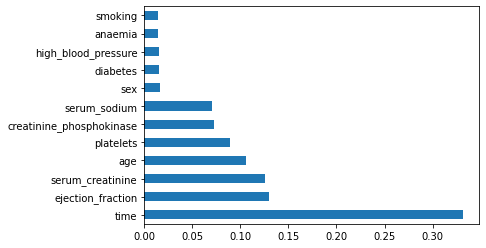

In [27]:
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [28]:
X_train2, X_test2 = train.iloc[:,[0,4,7,11]], test.iloc[:, [0,4,7,11]]

In [29]:
sc=StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.fit_transform(X_test2)

In [30]:
param_grid2 = {
    "n_estimators": [100, 500, 1000],
    "max_features": [0.5,1,'auto'],
    "max_depth": [1,2,3,4,None],
    "min_samples_split": [2,5,8]
}

clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid2, n_jobs=-1, verbose=2, cv=10)
grid.fit(X_train2, y_train)
grid.best_params_

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


{'max_depth': 2,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 500}

In [31]:
clf = RandomForestClassifier(
    n_estimators=500,
    max_features="auto",
    max_depth=2,
    min_samples_split=8,
    random_state=0)

In [34]:
clf.fit(X_train2, y_train)
y_prediction = clf.predict(X_train2)
y_prediction2 = clf.predict(X_test2)

print("Confusion matrix: ","\n", confusion_matrix(y_train, y_prediction))
print("Classification matrix: ","\n", classification_report(y_train, y_prediction))

print("Confusion matrix: ","\n", confusion_matrix(y_test, y_prediction2))
print("Classification matrix: ","\n", classification_report(y_test, y_prediction2))

Confusion matrix:  
 [[154   8]
 [ 24  53]]
Classification matrix:  
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       162
           1       0.87      0.69      0.77        77

    accuracy                           0.87       239
   macro avg       0.87      0.82      0.84       239
weighted avg       0.87      0.87      0.86       239

Confusion matrix:  
 [[40  1]
 [ 7 12]]
Classification matrix:  
               precision    recall  f1-score   support

           0       0.85      0.98      0.91        41
           1       0.92      0.63      0.75        19

    accuracy                           0.87        60
   macro avg       0.89      0.80      0.83        60
weighted avg       0.87      0.87      0.86        60



In [ ]:
# Reporting
# I evaluated the results I found with Confusion Matrix, the results are as follows:

# Correctly predicted -> %95.00 (282 of 297 predict are correct)

# True Negative -> %68.33 (41 people) -> Those who were predicted not to die and who did not die
# True Positive -> %26.67 (16 people) -> Those who were predicted to die and who did die
# Wrong predicted-> %10.98 (15 of 297 predict are wrong)

# False Positive -> %3.33 (2 people) -> Those who were predicted to die but who did not die
# False Negative -> %01.67 (1 people) -> Those who were predicted to not die but who did die

In [ ]:
# Przetestować bez outlierow